In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
!ls

chocolate_ratings.ipynb  flavors_of_cacao.csv


In [42]:
data = pd.read_csv('flavors_of_cacao.csv')
data.head()

,Company (Maker-if known),Specific Bean Origin or Bar Name,REF,Review Date,Cocoa Percent,Company Location,Rating,Bean Type,Broad Bean Origin
0,A. Morin,Agua Grande,1876,2016,63%,France,3.75,,Sao Tome
1,A. Morin,Kpime,1676,2015,70%,France,2.75,,Togo
2,A. Morin,Atsane,1676,2015,70%,France,3.00,,Togo
3,A. Morin,Akata,1680,2015,70%,France,3.50,,Togo
4,A. Morin,Quilla,1704,2015,70%,France,3.50,,Peru


In [43]:
data['Cocoa\nPercent'] = data['Cocoa\nPercent'].apply(lambda x: float(x.split('%')[0]))/100
data.head()

,Company (Maker-if known),Specific Bean Origin or Bar Name,REF,Review Date,Cocoa Percent,Company Location,Rating,Bean Type,Broad Bean Origin
0,A. Morin,Agua Grande,1876,2016,0.63,France,3.75,,Sao Tome
1,A. Morin,Kpime,1676,2015,0.70,France,2.75,,Togo
2,A. Morin,Atsane,1676,2015,0.70,France,3.00,,Togo
3,A. Morin,Akata,1680,2015,0.70,France,3.50,,Togo
4,A. Morin,Quilla,1704,2015,0.70,France,3.50,,Peru


In [44]:
data.columns[data.isnull().any()].tolist

<bound method IndexOpsMixin.tolist of Index(['Bean\nType', 'Broad Bean\nOrigin'], dtype='object')>

In [45]:
print(data.corr())

                     REF  Review\nDate  Cocoa\nPercent    Rating
REF             1.000000      0.985076        0.037791  0.101030
Review\nDate    0.985076      1.000000        0.038177  0.099846
Cocoa\nPercent  0.037791      0.038177        1.000000 -0.164820
Rating          0.101030      0.099846       -0.164820  1.000000


Chocolates Ratings do not have significant correlation with any other parameters

(array([  4.,  13.,  32., 141., 259., 644., 602.,  98.,   0.,   2.]),
 array([1. , 1.4, 1.8, 2.2, 2.6, 3. , 3.4, 3.8, 4.2, 4.6, 5. ]),
 <a list of 10 Patch objects>)

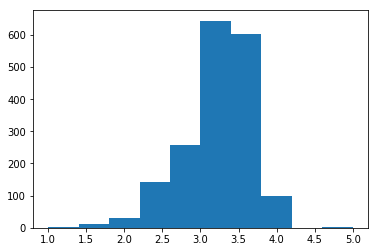

In [46]:
plt.hist(data['Rating'])

Most Chocolates have ratings between 3.0 and 4.0

(array([  2.,   2.,  27., 190., 779., 561., 145.,  54.,  13.,  22.]),
 array([0.42 , 0.478, 0.536, 0.594, 0.652, 0.71 , 0.768, 0.826, 0.884,
        0.942, 1.   ]),
 <a list of 10 Patch objects>)

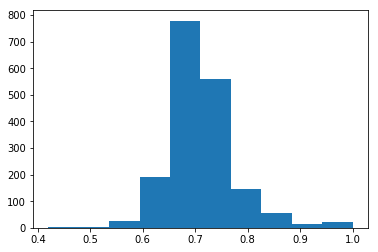

In [48]:
plt.hist(data['Cocoa\nPercent'])

Most chocolates have 70%  of cocoa

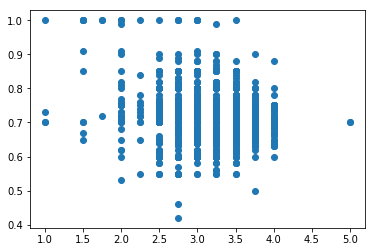

In [57]:
plt.plot(data['Rating'], data['Cocoa\nPercent'],'o')

This shows no correlation between the amount of cocoa to the ratings of the chocolates

In [66]:
data['Specific Bean Origin\nor Bar Name'][data['Rating']==5]

78            Chuao
86    Toscano Black
Name: Specific Bean Origin\nor Bar Name, dtype: object

Chuao and Toscano Black got the bean for highest rated chocolates

In [68]:
data['Company\xa0\n(Maker-if known)'][data['Rating']==5]

78    Amedei
86    Amedei
Name: Company \n(Maker-if known), dtype: object

Amedei got the 5 star rated chocolates. Let's see what average rating they got.

In [82]:
amedei=data['Rating'][data['Company\xa0\n(Maker-if known)']=='Amedei']
print(amedei)
print('Average rating for Amedei is: ',amedei.mean().round(2))

75    3.75
76    4.00
77    4.00
78    5.00
79    3.00
80    3.00
81    3.50
82    3.75
83    4.00
84    3.50
85    3.50
86    5.00
87    4.00
Name: Rating, dtype: float64
Average rating for Amedei is:  3.85


In [91]:
data[data['Specific Bean Origin\nor Bar Name'].isin(['Chuao', 'Toscano Black'])]

,Company (Maker-if known),Specific Bean Origin or Bar Name,REF,Review Date,Cocoa Percent,Company Location,Rating,Bean Type,Broad Bean Origin
17,A. Morin,Chuao,1015,2013,0.70,France,4.00,Trinitario,Venezuela
38,Alain Ducasse,Chuao,1061,2013,0.75,France,2.50,Trinitario,Venezuela
57,Amano,Chuao,544,2010,0.70,U.S.A.,3.00,Trinitario,Venezuela
78,Amedei,Chuao,111,2007,0.70,Italy,5.00,Trinitario,Venezuela
85,Amedei,Toscano Black,170,2007,0.63,Italy,3.50,Blend,
86,Amedei,Toscano Black,40,2006,0.70,Italy,5.00,Blend,
87,Amedei,Toscano Black,75,2006,0.66,Italy,4.00,Blend,
177,Benoit Nihant,Chuao,1141,2013,0.74,Belgium,3.50,Criollo,Venezuela
247,Bonnat,Chuao,81,2006,0.75,France,4.00,Trinitario,Venezuela
256,Brasstown aka It's Chocolate,Chuao,1355,2014,0.70,U.S.A.,4.00,Trinitario,Venezuela


The 5 rating for the chocolate is probably because the company and the place of the bean.
Amedei which produces chocolates from Chuao and Toscano Black produces the highest rated chocolates. Best beans are grown in Venezuela.

In [93]:
chuao=data['Rating'][data['Specific Bean Origin\nor Bar Name']=='Chuao']
toscano=data['Rating'][data['Specific Bean Origin\nor Bar Name']=='Toscano Black']
print('Average rating for chocolates produced from Chuao bean is: ',chuao.mean().round(2))
print('Average rating for chocolates produced from Toscano Black bean is: ',toscano.mean().round(2))

Average rating for chocolates produced from Chuao bean is:  3.33
Average rating for chocolates produced from Toscano Black bean is:  4.17


Generally, chocolates produced from Toscano Black bean has average higher rating than that from Chuao bean.

In [105]:
data['Company\xa0\n(Maker-if known)'][data['Rating']<2]

125          Artisan du Chocolat
132          Artisan du Chocolat
245                       Bonnat
249       Bouga Cacao (Tulicorp)
324      Cacaoyere (Ecuatoriana)
326                    Callebaut
437              Claudio Corallo
449                    Coppeneur
465           Cote d' Or (Kraft)
554           Dolfin (Belcolade)
828               Hotel Chocolat
988     Machu Picchu Trading Co.
1129                  Middlebury
1175         Neuhaus (Callebaut)
1411                    S.A.I.D.
1492           Snake & Butterfly
1694                    Valrhona
Name: Company \n(Maker-if known), dtype: object

These companies produce the lowest rated (<2) chololates.